Возьмите датасет Mortality and Water Hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

#Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

#Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_mort_water = pd.read_csv('water.csv',sep=',')
df_mort_water.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
7,8,South,Bournemouth,1299,78
8,9,North,Bradford,1637,10
9,10,South,Brighton,1359,84


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

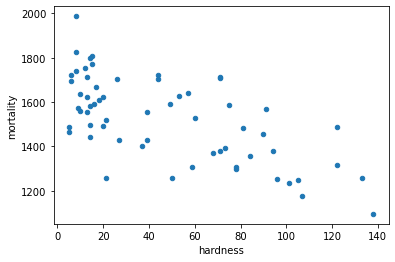

In [14]:
# Задание 1.
# Отвечаем на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
df_mort_water.plot(kind='scatter', x='hardness', y='mortality')
# Построим точечный график

In [15]:
# С помощью построенного нами точечного графика мы можем наблюдать некоторую обратную связь между показателями жесткости воды и смертностью.
# Чтобы определить коэффициент корреляции рассчитаем их по формулам Пирсона и Спирмена

df_mort_water[['hardness', 'mortality']].corr() # коэффициент Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [16]:
df_mort_water[['hardness', 'mortality']].corr(method='spearman') # коэффициент Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [17]:
df_mort_water[['hardness', 'mortality']].corr(method='kendall') # я расчитала также коэффициент Кенделла. 
# Как и ожидалось, этот коэффициент дал более консервативную оценнку корреляции

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [20]:
# Строим модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_mort_water[['hardness']]
y = df_mort_water['mortality']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
# Сделаем так, чтобы метод обучился на наших данных и подобрал оптимальные коэффициенты
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [28]:
print('Коэффициент при Х: ', model.coef_)
print('Коэффициент B: ', model.intercept_)

Коэффициент при Х:  [-3.13167087]
Коэффициент B:  1668.9722977277095


In [32]:
# Рассчитываем коэффициент детерминации
print('Коэффициент детерминации: ', model.score(X_test, y_test))

Коэффициент детерминации:  0.5046490611017092


In [62]:
y_pred = model.predict(X_test)
y_pred

array([1271.31039304, 1605.08616822, 1591.03245137, 1485.629575  ,
       1366.17298178, 1569.95187609, 1172.9343751 , 1376.71326941,
       1566.43844688, 1619.13988507, 1432.92813681, 1355.63269414,
       1503.19672106, 1591.03245137, 1390.76698626, 1503.19672106,
       1605.08616822, 1587.51902216, 1285.36410989])

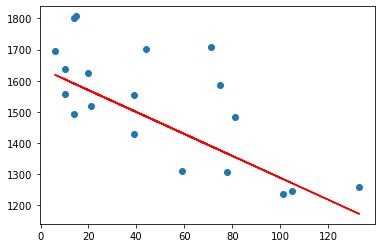

In [63]:
# Выводим график остатков
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [45]:
# Разделим данные на 2 группы - Южные и Северные города
df_mort_water_south = df_mort_water[df_mort_water['location']=='South']
df_mort_water_south.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


In [46]:
df_mort_water_north = df_mort_water[df_mort_water['location']=='North']
df_mort_water_north.head(10)

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

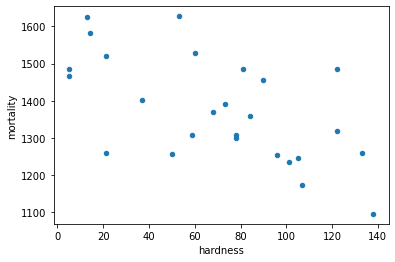

In [47]:
# Повторяем аналогичные шаги из пункта 1 для каждой группы по отдельности
# Сначала для южных городов
# Отвечаем на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью в южных городах?
df_mort_water_south.plot(kind='scatter', x='hardness', y='mortality')
# Построим точечный график

In [48]:
df_mort_water_south[['hardness', 'mortality']].corr() # коэффициент Пирсона (по Южным городам)

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [51]:
df_mort_water_south[['hardness', 'mortality']].corr(method='spearman') # коэффициент Спирмена (по Южным городам)

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [69]:
# Строим модель линейной регрессии по Южным городам
X_1 = df_mort_water_south[['hardness']]
y_1 = df_mort_water_south['mortality']

In [52]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.30, random_state=42)

In [53]:
# Сделаем так, чтобы метод обучился на наших данных и подобрал оптимальные коэффициенты для Южных городов
model = LinearRegression()
model.fit(X_1_train, y_1_train) 

LinearRegression()

In [55]:
print('Коэффициент при Х (Южные города): ', model.coef_)
print('Коэффициент B (Южные города): ', model.intercept_)

Коэффициент при Х (Южные города):  [-3.51342921]
Коэффициент B (Южные города):  1640.2204603423374


In [90]:
# Рассчитываем коэффициент детерминации для Южных городов
print('Коэффициент детерминации (Южные города)', model.score(X_1_test, y_1_test))

Коэффициент детерминации (Южные города) -4.912747256343536


In [64]:
y_pred_1 = model.predict(X_1_test)
y_pred_1

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

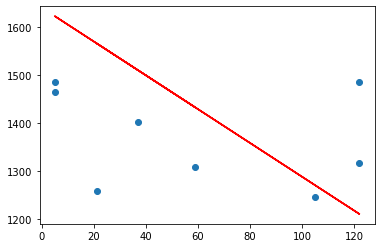

In [65]:
# Выводим график остатков по Южным городам
plt.scatter(X_1_test, y_1_test)
plt.plot(X_1_test, y_pred_1, c='r')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

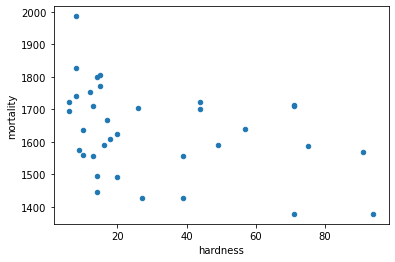

In [66]:
# Теперь для северных городов
# Отвечаем на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью в северных городах?
df_mort_water_north.plot(kind='scatter', x='hardness', y='mortality')
# Построим точечный график

In [92]:
df_mort_water_south[['hardness', 'mortality']].corr() # коэффициент Пирсона (по Северным городам)

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [93]:
df_mort_water_north[['hardness', 'mortality']].corr(method='spearman') # коэффициент Спирмена (по Северным городам)

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [70]:
# Строим модель линейной регрессии по Северным городам
X_2 = df_mort_water_north[['hardness']]
y_2 = df_mort_water_north['mortality']

In [71]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.30, random_state=42)

In [72]:
# Сделаем так, чтобы метод обучился на наших данных и подобрал оптимальные коэффициенты для Северных городов
model = LinearRegression()
model.fit(X_2_train, y_2_train) 

LinearRegression()

In [73]:
print('Коэффициент при Х (Северные города): ', model.coef_)
print('Коэффициент B (Северные города): ', model.intercept_)

Коэффициент при Х (Северные города):  [-1.97686226]
Коэффициент B (Северные города):  1688.150229031281


In [91]:
# Рассчитываем коэффициент детерминации для Северных городов
print('Коэффициент детерминации (Северные города): ', model.score(X_2_test, y_2_test))

Коэффициент детерминации (Северные города):  0.018885304285745863


In [80]:
y_pred_2 = model.predict(X_2_test)
y_pred_2

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

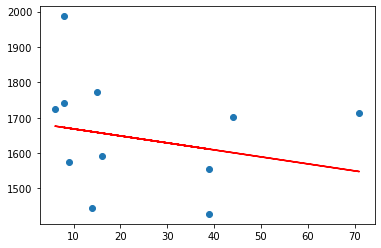

In [81]:
# Выводим график остатков по Южным городам
plt.scatter(X_2_test, y_2_test)
plt.plot(X_2_test, y_pred_2, c='r')

#Задание 2.
#Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Согласно произведенным вычислениям и построенным точечным графикам, в южных городах сохраняется таже зависимость между жёсткостью воды и средней годовой смертностью (обратная связь). В северных городах эта зависиомсть намного ниже